In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [291]:
df = pd.read_csv("datasets/building_3_year.csv", sep=';')

In [ ]:
def plot_summary(dataframe):
    dataframe.info()
    dataframe.tail()
    print(dataframe.dtypes)
    dataframe.head()
    null_value_info = get_null_info(df.copy())
    print(null_value_info)

In [292]:
df['Internal temperature area 1 (Celsius degree)'] = df['Internal temperature area 1 (Celsius degree)'].str.replace(',', '.').astype(float)
df['Internal temperature area 2 (Celsius degree)'] = df['Internal temperature area 2 (Celsius degree)'].str.replace(',', '.').astype(float)
df['HVAC power (kW)'] = df['HVAC power (kW)'].str.replace(',', '.').astype(float)
df['External temperature (Celsius degree)'] = df['External temperature (Celsius degree)'].str.replace(',', '.').astype(float)

In [293]:
df['Date and time'] = pd.to_datetime(df['Date and time'], format='%d/%m/%Y %H:%M:%S')

In [239]:
def get_null_info(df):
  """
  This function provides detailed information about null values in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame to analyze.

  Returns:
      A dictionary containing information about null values for each column.
  """
  null_info = {}
  for col in df.columns:
    null_count = df[col].isnull().sum()
    null_perc = null_count / len(df) * 100
    consecutive_nulls = df[col].isnull().cumsum().max()  # Max consecutive nulls
    null_info[col] = {'Count': null_count, 'Percentage': null_perc, 'Consecutive Nulls': consecutive_nulls}
  return null_info

# Plot Dataframe Year

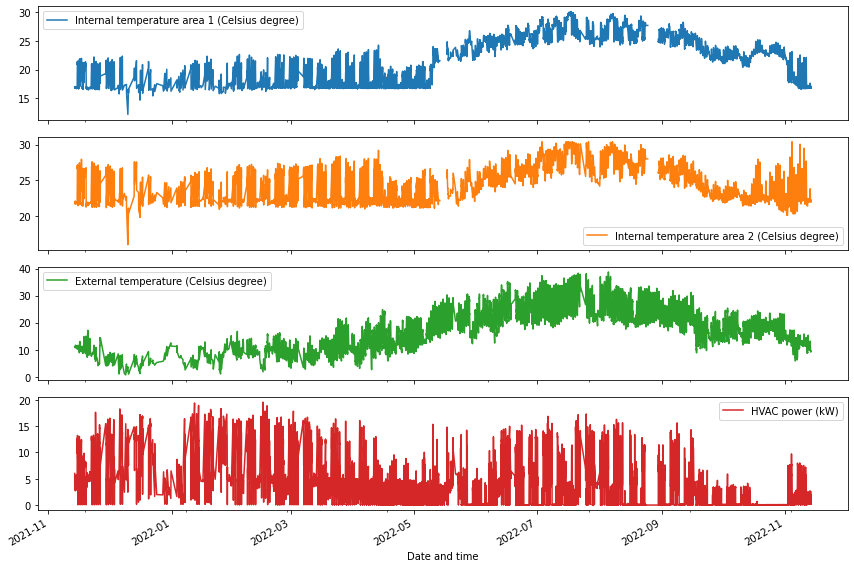

In [294]:
df.set_index('Date and time', inplace=True)

# Plot the last 4 columns
df.plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot Dataframe Month

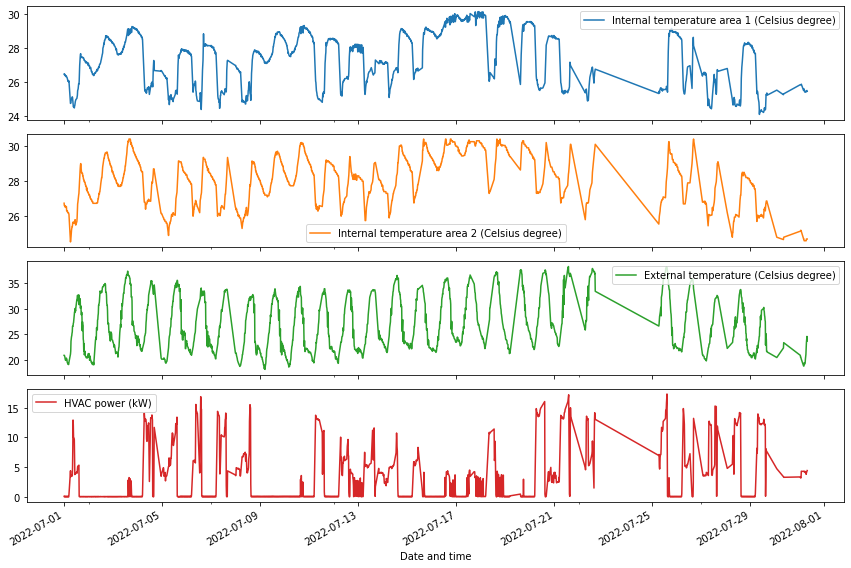

In [295]:
target_month = 7  # October

# Filter data for the specified month
df_month = df[df.index.month == target_month]

# Plot the data for the specified month
df_month.plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot Dataframe Day

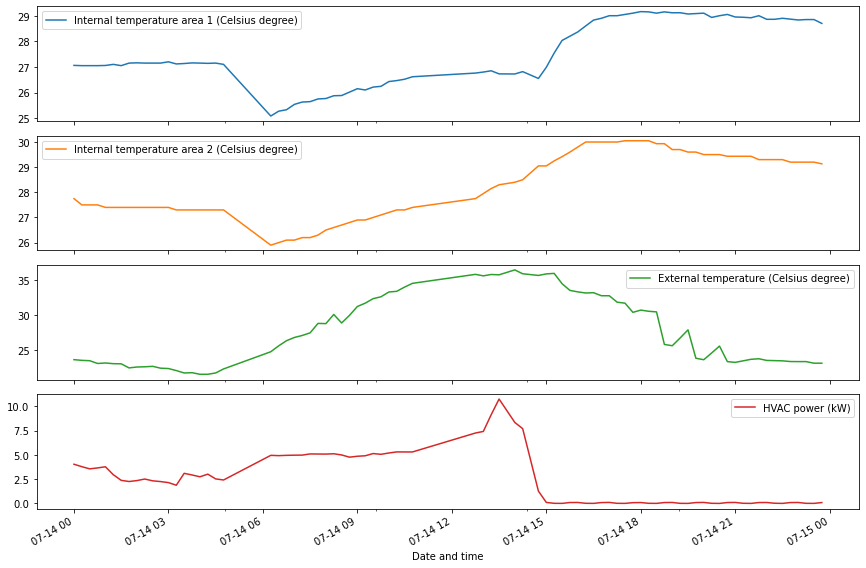

In [296]:
# Specify the desired day
target_day = '2022-07-14'  # Replace with your desired date

# Filter data for the specified day
df_day = df[df.index.date == pd.to_datetime(target_day).date()]

# Plot the data for the specified day
df_day.plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot for each clean Dataframe

1
building_1_year
165    14/10/2022
Name: Date, dtype: object
['02/04/2022', '03/05/2022', '07/05/2022', '08/05/2022', '08/11/2022', '09/11/2022', '10/02/2022', '10/04/2022', '12/11/2022', '14/04/2022', '18/11/2021', '19/02/2022', '19/04/2022', '21/03/2022', '21/04/2022', '25/04/2022', '26/02/2022', '31/03/2022']


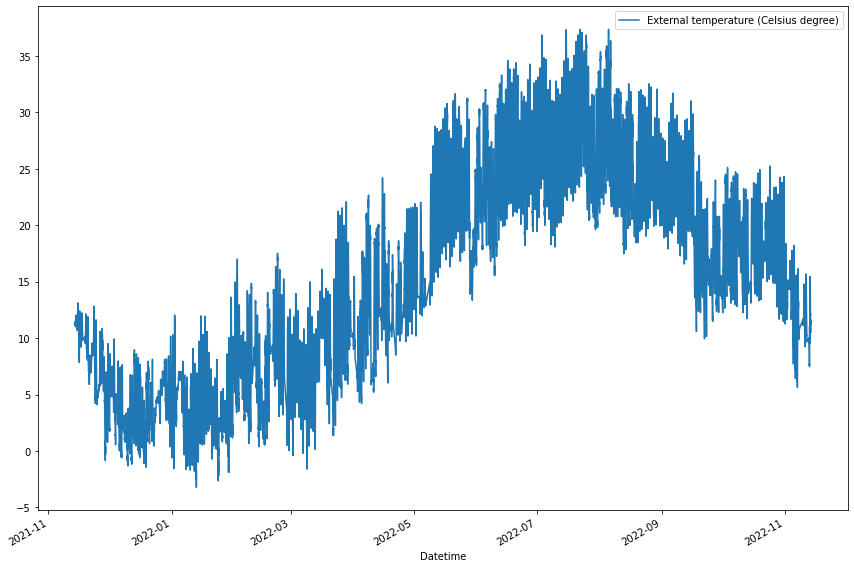

2
building_2_year
165    14/10/2022
Name: Date, dtype: object
[]


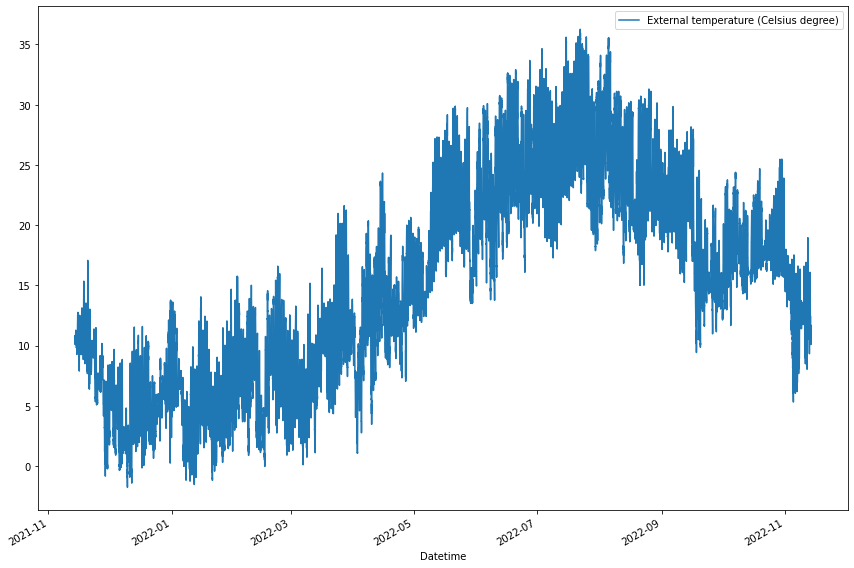

3
building_3_year
155    14/10/2022
Name: Date, dtype: object
['01/02/2022', '01/03/2022', '01/04/2022', '01/05/2022', '01/07/2022', '01/08/2022', '01/09/2022', '01/12/2021', '02/02/2022', '02/03/2022', '02/04/2022', '02/05/2022', '02/06/2022', '02/08/2022', '02/09/2022', '02/11/2022', '02/12/2021', '03/01/2022', '03/02/2022', '03/03/2022', '03/04/2022', '03/05/2022', '03/06/2022', '03/08/2022', '03/11/2022', '03/12/2021', '04/01/2022', '04/02/2022', '04/03/2022', '04/04/2022', '04/05/2022', '04/07/2022', '04/08/2022', '04/11/2022', '05/01/2022', '05/02/2022', '05/04/2022', '05/05/2022', '05/07/2022', '05/08/2022', '05/09/2022', '05/11/2022', '05/12/2021', '06/01/2022', '06/04/2022', '06/05/2022', '06/06/2022', '06/07/2022', '06/09/2022', '06/11/2022', '06/12/2021', '07/01/2022', '07/02/2022', '07/03/2022', '07/04/2022', '07/05/2022', '07/06/2022', '07/07/2022', '07/09/2022', '07/11/2022', '07/12/2021', '08/02/2022', '08/03/2022', '08/04/2022', '08/06/2022', '08/07/2022', '08/08/2022',

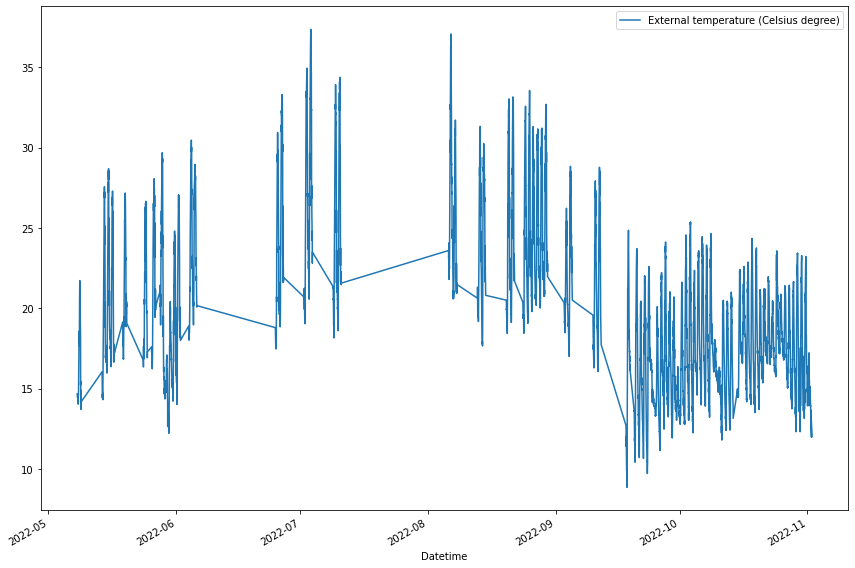

4
building_4_year
165    14/10/2022
Name: Date, dtype: object
['07/03/2022']


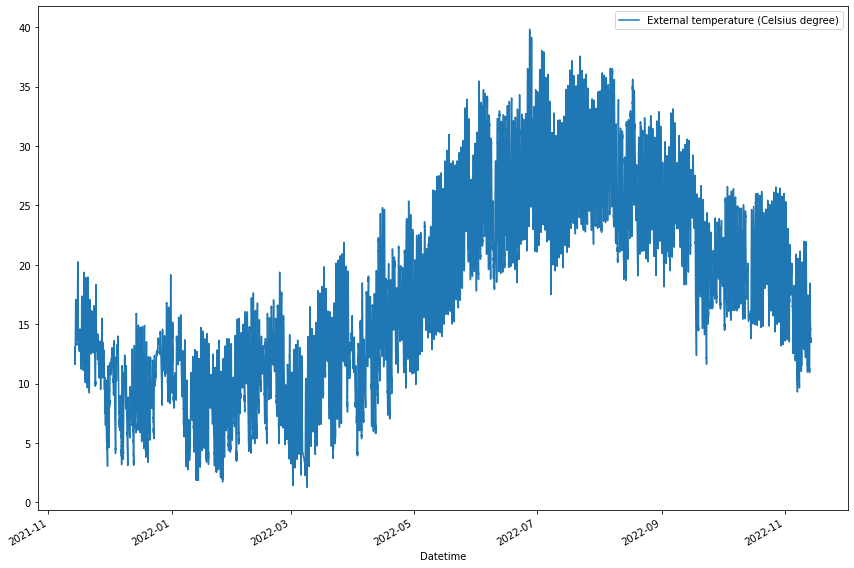

5
building_5_year
165    14/10/2022
Name: Date, dtype: object
[]


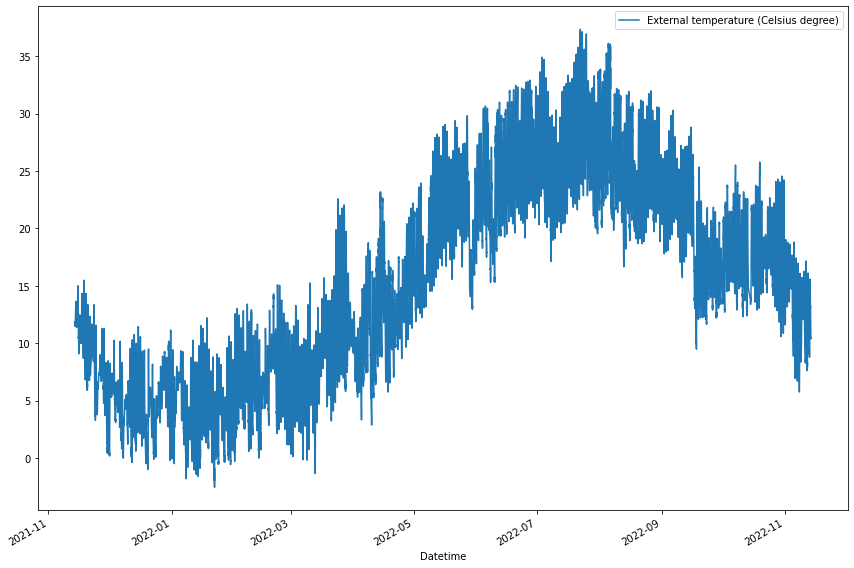

In [8]:
for i in range(1,6):
    print(i)
    df = pd.read_csv(f"datasets/building_{i}_year.csv", sep=';')

    # Split Date and Time
    df['Date and time'] = df['Date and time'].astype(str)
    df[['Date', 'Time']] = df['Date and time'].str.split(' ', expand=True)
    df = df.drop('Date and time', axis=1)

    df = df.drop('Internal temperature area 1 (Celsius degree)', axis=1)
    df = df.drop('Internal temperature area 2 (Celsius degree)', axis=1)
    df = df.drop('HVAC power (kW)', axis=1)

    # Count if there are NaN inside rows
    nan_date = check_nan_per_day(df)
    df_nan_date = nan_date[nan_date['any_nan'] == True]['Date']
    print(f'building_{i}_year')
    print(df_nan_date)
    # Count if there are missing measurements
    measurement_date_under96 = count_measurements_per_day(df).tolist()
    print(measurement_date_under96)

    # Typing as float
    # df['Internal temperature area 1 (Celsius degree)'] = df['Internal temperature area 1 (Celsius degree)'].str.replace(',', '.').astype(float).round(3)
    # df['Internal temperature area 2 (Celsius degree)'] = df['Internal temperature area 2 (Celsius degree)'].str.replace(',', '.').astype(float).round(3)
    # df['HVAC power (kW)'] = df['HVAC power (kW)'].str.replace(',', '.').astype(float).round(3)
    df['External temperature (Celsius degree)'] = df['External temperature (Celsius degree)'].str.replace(',', '.').astype(float).round(3)

    # Check about above or lower 100 or 0 degree Internal Area 1
    # mask = (df['Internal temperature area 1 (Celsius degree)'] >= 0) & (df['Internal temperature area 1 (Celsius degree)'] <= 100)
    # df = df[mask]

    # Save inside CSV
    df = df[~df['Date'].isin(df_nan_date)]
    df = df[~df['Date'].isin(measurement_date_under96)]
    df = df.drop(columns='has_nan')
    df.to_csv(f"datasets/building_{i}_clean_external.csv", index=False, sep=";")

    # Plot entire dataset
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d/%m/%Y %H:%M:%S")
    df.set_index('Datetime', inplace=True)
    df = df.drop(['Date', 'Time'], axis=1)
    df.plot(subplots=True, figsize=(12, 8))
    plt.tight_layout()
    plt.show()




In [ ]:
df = pd.read_csv("datasets/building_1_clean.csv", sep=',')
df.head()

,Internal temperature area 1 (Celsius degree),Internal temperature area 2 (Celsius degree),External temperature (Celsius degree),HVAC power (kW),Date,Time
0,22,"22,5","11,2","3,2312222222222236",14/11/2021,00:00:00
1,"22,25","22,5","11,2","3,928539325842698",14/11/2021,00:15:00
2,"21,5","22,5","11,21","2,9882222222222214",14/11/2021,00:30:00
3,"21,5","22,5","11,2","3,2384444444444447",14/11/2021,00:45:00
4,"21,5","22,5","11,37","3,33488888888889",14/11/2021,01:00:00


In [6]:
def check_nan_per_day(df):
  """Checks if there are NaN values for each day in a DataFrame.

  Args:
    df: The pandas DataFrame to check.

  Returns:
    A DataFrame with columns 'Date' and 'has_nan', indicating if there were NaN values for each day.
  """
  df['has_nan'] = df.isnull().any(axis=1)  # Check for NaN in each row

  result = df.groupby('Date')['has_nan'].any().reset_index()
  result.rename(columns={'has_nan': 'any_nan'}, inplace=True)

  return result

In [7]:
def count_measurements_per_day(df, timestamp_col='timestamp'):
  """Counts the number of measurements per day in a DataFrame.

  Args:
    df: The pandas DataFrame containing the data.
    timestamp_col: The name of the column containing timestamps.

  Returns:
    A pandas Series with the count of measurements for each day.
  """

  # Group by date and count the number of measurements
  measurements_per_day = df.groupby('Date').size()

  return measurements_per_day[measurements_per_day < 96].index